In [1]:
import pyvista as pv
import numpy as np
import tetgen


/Users/DiarmuidFogarty/miniconda3/envs/tetgen/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


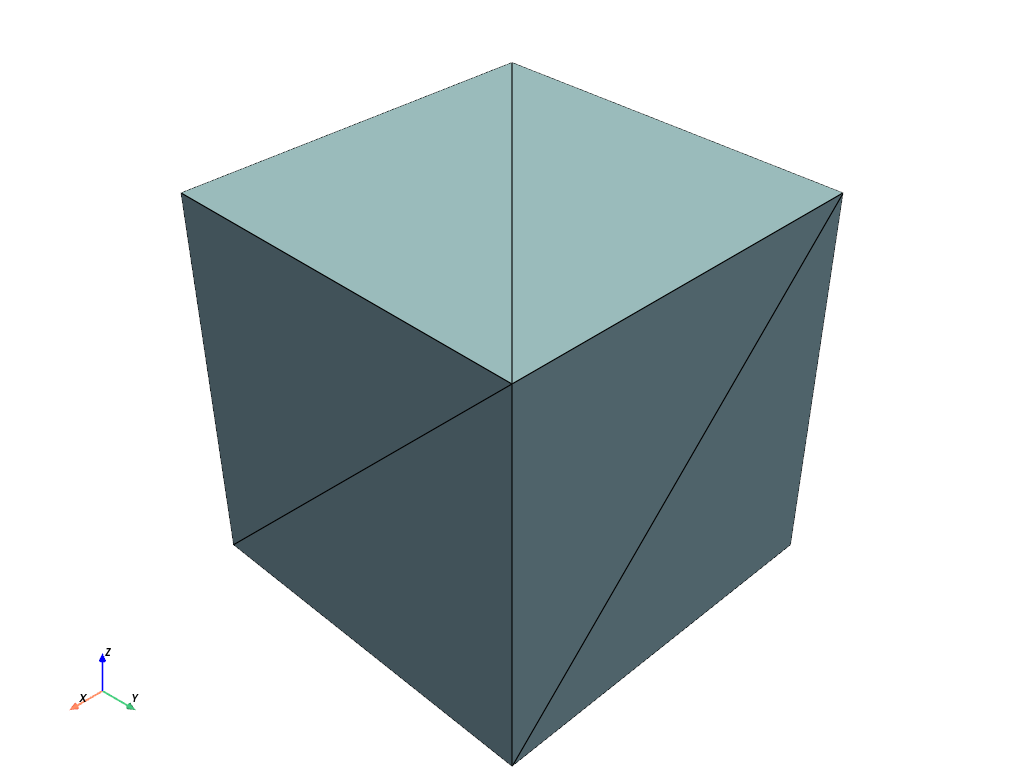

In [4]:
v = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1],
    ]
)
f = np.vstack(
    [
        [0, 1, 2],
        [2, 3, 0],
        [0, 1, 5],
        [5, 4, 0],
        [1, 2, 6],
        [6, 5, 1],
        [2, 3, 7],
        [7, 6, 2],
        [3, 0, 4],
        [4, 7, 3],
        [4, 5, 6],
        [6, 7, 4],
    ]
)
tgen = tetgen.TetGen(v, f)
nodes, elems = tgen.tetrahedralize()
tgen.grid.plot(show_edges=True)

In [5]:
# Example set of 3D points
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
])

# Create a surface (example: cube geometry)
faces = np.hstack([
    [4, 0, 1, 5, 4],  # Quad face (as a list of 4 points)
    [4, 1, 2, 6, 5],
    [4, 2, 3, 7, 6],
    [4, 3, 0, 4, 7],
    [4, 4, 5, 6, 7],
    [4, 0, 3, 2, 1],
])  # PyVista uses a flattened list to represent faces

surface = pv.PolyData(points, faces)


# Initialize TetGen with the surface mesh
tgen = tetgen.TetGen(surface)

# Perform tetrahedralization
# Add flags for stability (e.g., 'pq1.4a' ensures quality tetrahedra and prevents slivers)
tetrahedralized_mesh = tgen.tetrahedralize(order=1, mindihedral=1.4, opts='pq1.4')

# Extract the points and elements of the tetrahedral mesh
tet_points = tetrahedralized_mesh.points
tet_elements = tetrahedralized_mesh.elements

tgen.grid.plot(show_edges=True)

/Users/DiarmuidFogarty/miniconda3/envs/tetgen/lib/python3.13/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


RuntimeError: Invalid mesh.  Must be an all triangular mesh